In [1]:
## Importo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Comienzo leyendo el archimo "edx_courses"
edx= pd.read_csv('edx_courses.csv', sep= ',')

In [3]:
## Visualizo las primeras 5 lineas, para tener un panorama rápido de la informacion
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [4]:
## veo sus dimensiones
edx.shape

(975, 16)

In [5]:
## Voy a tener mas informacion del dataset
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [6]:
edx.describe(exclude=[np.number])

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [7]:
## Voy a chequear la cantidad de nulos
edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [8]:
## voy a chequear su % de nulos
list = edx.isna().sum()
list = list[list > 0].div(edx.shape[0]).mul(100)
list

summary                5.435897
n_enrolled            12.307692
instructors            0.307692
subtitles              0.307692
course_description     4.102564
course_syllabus       57.230769
dtype: float64

In [9]:
## Comienzo a trabajar con la columna n_enrolled,  voy a cambiar el tipo de datos de las columnas n_enrolled y a rellenar los
## valores Nan con ceros

edx['n_enrolled'] = edx['n_enrolled'].str.replace(',', '')

In [10]:
edx.n_enrolled.fillna(0, inplace=True)

In [11]:
edx['n_enrolled'] =edx['n_enrolled'].astype(int)

In [12]:
edx.describe()

,n_enrolled
count,9.750000e+02
mean,4.670523e+04
std,1.128239e+05
min,0.000000e+00
25%,8.529500e+03
50%,1.968700e+04
75%,4.891850e+04
max,2.442271e+06


In [13]:
## ya no quedaron valores Nan
edx['n_enrolled'].isna().sum()

0

In [14]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          975 non-null    int32 
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: int32(1), object(15)
me

In [15]:
## Ahora voy a eliminar la columna course_syllabus,summary,course_description xq no las voy a tener en cuenta 
## para mi analisis y tienen valores nulos
edx.drop(columns= ['course_syllabus', 'summary', 'course_description'], inplace=True)

In [16]:
edx.shape

(975, 13)

In [17]:
## a las columnas instructors  y subtitles voy a borrar los nan de las filas xq tienen solo 3
edx = edx.dropna(subset=["instructors"])
edx = edx.dropna(subset=["subtitles"])

In [18]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_url
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,https://www.edx.org/course/marketing-analytics...


In [19]:
## Ahora voy a trabajar con la columna price, porque necesito tener el precio en una columna nueva, seprado
def numeros(edx):
   
    lista = []
    for i in range(0,len(edx)):
        x = edx.iloc[i,11]
        numero= x[37:-4]
        numero = float(numero)
        lista.append(numero)
    edx.drop(['price'], inplace = True, axis = 1)
    edx.insert(11, "price_2", lista)
    return edx.head(5)
    

In [20]:
numeros(edx)

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price_2,course_url
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49.0,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90.0,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249.0,https://www.edx.org/course/marketing-analytics...


In [21]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price_2,course_url
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49.0,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90.0,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249.0,https://www.edx.org/course/marketing-analytics...


In [22]:
edx.rename({'price_2': 'price'}, axis=1, inplace = True)

In [23]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_url
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49.0,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90.0,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249.0,https://www.edx.org/course/marketing-analytics...


In [24]:
## ahora voy a chequear que no queden nulos
edx.isna().sum()

title            0
n_enrolled       0
course_type      0
institution      0
instructors      0
Level            0
subject          0
language         0
subtitles        0
course_effort    0
course_length    0
price            0
course_url       0
dtype: int64

In [33]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words_no = set(stopwords.words('english')+ ["para","la", "de","using","Using", "learn", "tough", "Stanford", "Introduction", "Introducción","First", "Step","Skills", "Essentials", "Crash", "mental", "tools", "master", "Everyone","World","tuning","Networks","Structures","Well", "Optimization","Infraestructure", "Healt","Fundamentals", "Becoming", "Beginners","subjects", "Programming", "Getting", "Started", "help","Powerfull","Everybody", "Aprendiendo" ,"Infraestructure","Platform", "Punctuation"])

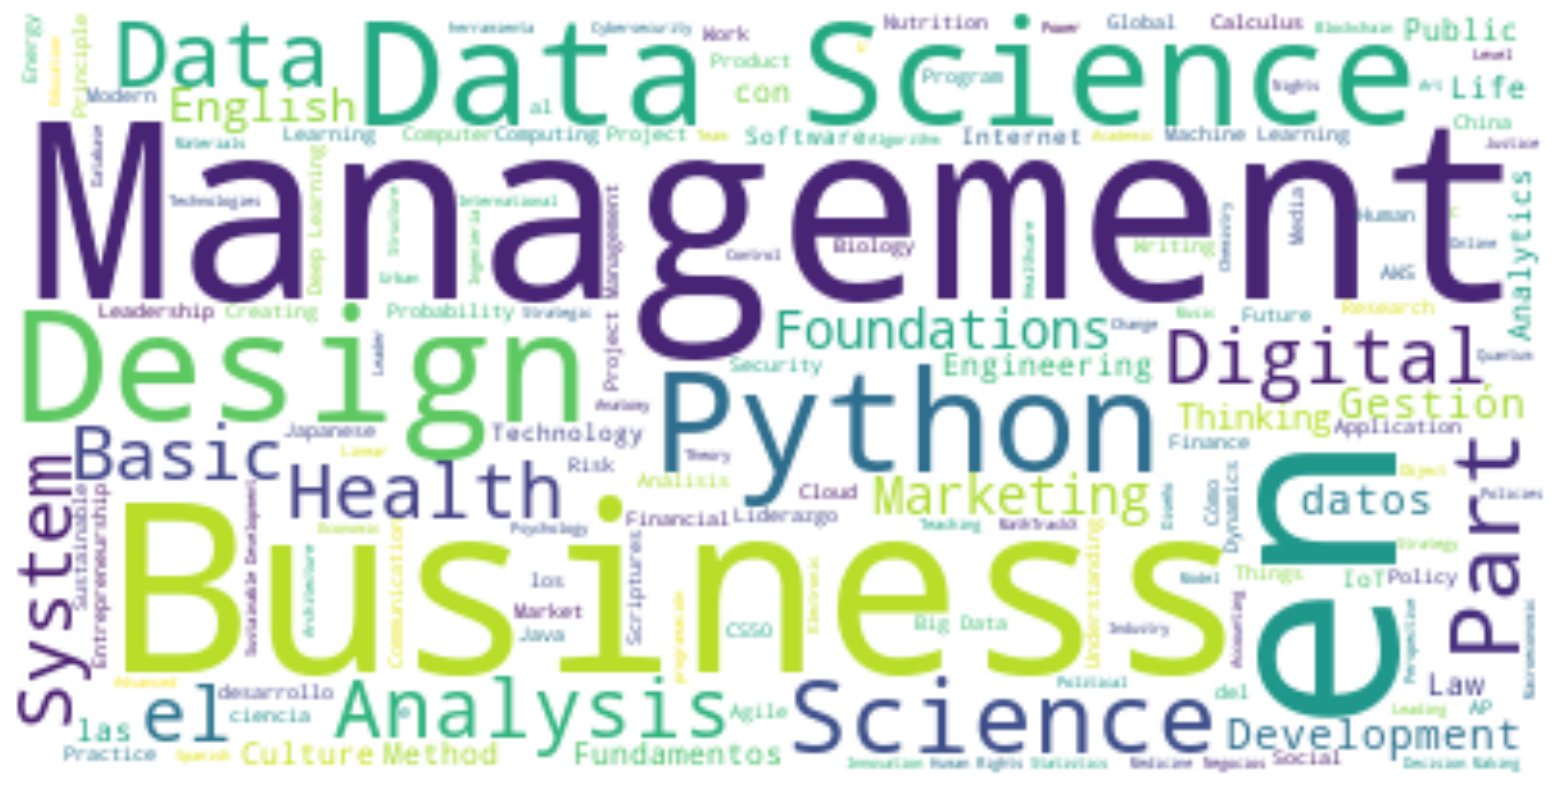

In [34]:
## Realizo un WordCloud para visualizar la importancia de las palabras en el nombre del curso

from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = stop_words_no

description_plain_text = edx['title'].str.cat(sep=' ')
cloud_prueba = WordCloud(background_color = "white",stopwords = stopwords).generate(description_plain_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_prueba, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## en este caso se observa las siguientes palabras como mas sobresalientes:

## Management, Business, Desing, Python, Data Science

In [56]:
## ahora voy a chequear si hay duplicados
edx.duplicated().sum()

1

In [57]:
## como hay uno, lo voy a eliminar
edx.drop_duplicates(inplace= True)

In [58]:
## voy a separar la columna course_length que quizas me sirva para el analisis
edx[['tiempo_duracion', 'medida_duracion']] = edx["course_length"].str.split(expand=True)

In [59]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_url,tiempo_duracion,medida_duracion
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49.0,https://www.edx.org/course/how-to-learn-online,2,Weeks
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49.0,https://www.edx.org/course/programming-for-eve...,7,Weeks
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90.0,https://www.edx.org/course/cs50s-introduction-...,12,Weeks
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199.0,https://www.edx.org/course/the-analytics-edge,13,Weeks
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249.0,https://www.edx.org/course/marketing-analytics...,4,Weeks


In [60]:
## ahora borro la columna q dividi

edx.drop(columns= ['course_length'], inplace=True)

In [61]:
## Cambio el tipo de dato a entero
edx['tiempo_duracion'] =edx['tiempo_duracion'].astype(int)

In [62]:
## Chequeo los tipos de datos
edx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 974
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            970 non-null    object 
 1   n_enrolled       970 non-null    int32  
 2   course_type      970 non-null    object 
 3   institution      970 non-null    object 
 4   instructors      970 non-null    object 
 5   Level            970 non-null    object 
 6   subject          970 non-null    object 
 7   language         970 non-null    object 
 8   subtitles        970 non-null    object 
 9   course_effort    970 non-null    object 
 10  price            970 non-null    float64
 11  course_url       970 non-null    object 
 12  tiempo_duracion  970 non-null    int32  
 13  medida_duracion  970 non-null    object 
dtypes: float64(1), int32(2), object(11)
memory usage: 106.1+ KB


In [109]:
## quiero ver los valores unicos del Level
edx.Level.unique()

array(['Introductory', 'Intermediate', 'Advanced'], dtype=object)

In [110]:
edx['Level'].value_counts()

Introductory    619
Intermediate    265
Advanced         86
Name: Level, dtype: int64

In [69]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,price,course_url,tiempo_duracion,medida_duracion
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,49.0,https://www.edx.org/course/how-to-learn-online,2,Weeks
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,49.0,https://www.edx.org/course/programming-for-eve...,7,Weeks
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,90.0,https://www.edx.org/course/cs50s-introduction-...,12,Weeks
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,199.0,https://www.edx.org/course/the-analytics-edge,13,Weeks
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,249.0,https://www.edx.org/course/marketing-analytics...,4,Weeks


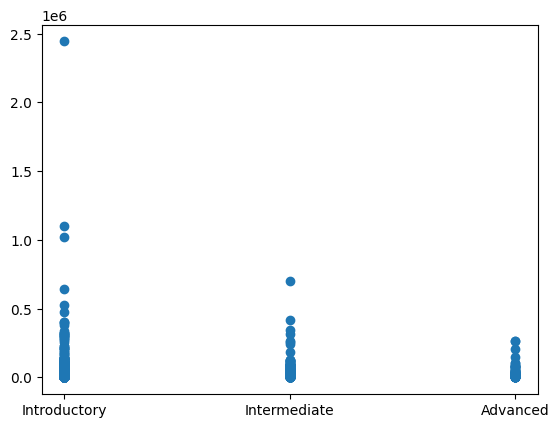

In [335]:
levels = edx['Level']
suscriptors =edx['n_enrolled']

fig = plt.figure()
ax = plt.axes()
ax.scatter(levels,suscriptors)

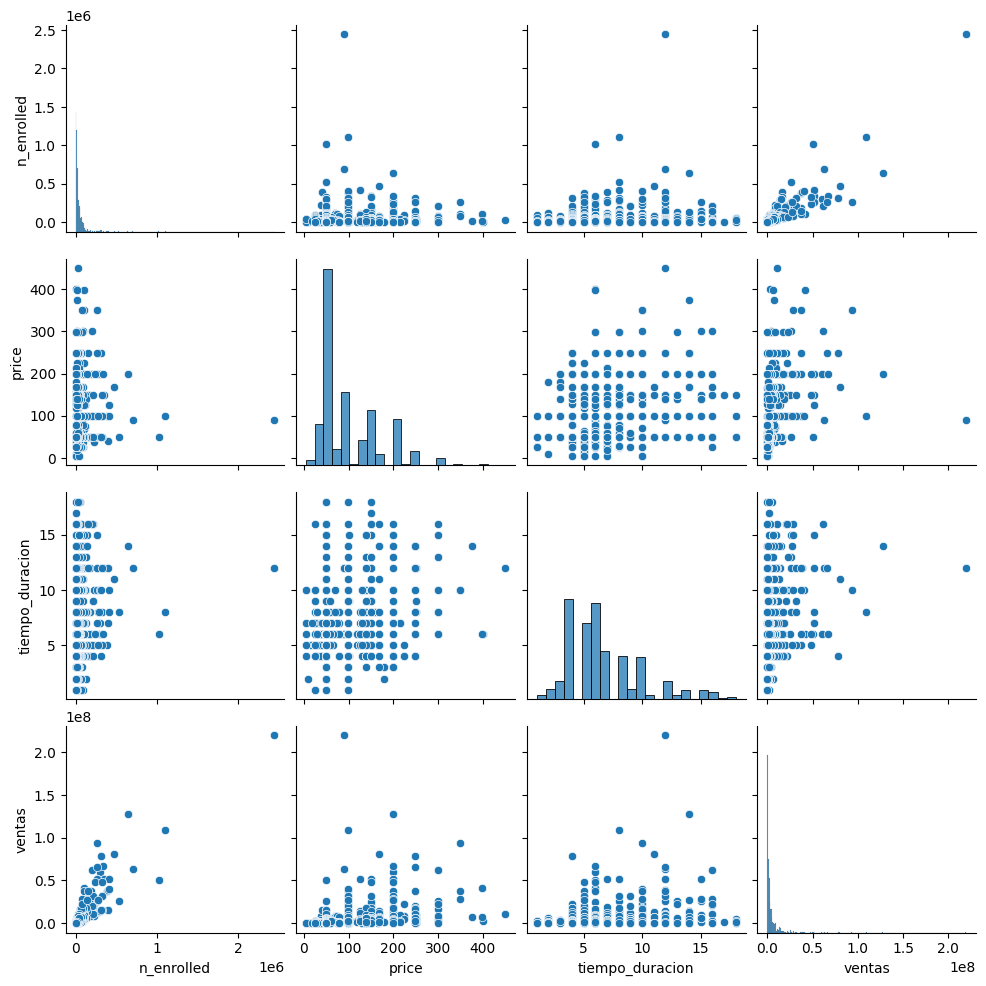

In [336]:
sns.pairplot(data=edx)

In [111]:
edx.course_type.unique()

array(['Self-paced on your time', 'Instructor-led on a course schedule'],
      dtype=object)

In [112]:
edx['course_type'].value_counts()

Self-paced on your time                914
Instructor-led on a course schedule     56
Name: course_type, dtype: int64

In [113]:
edx.subject.unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

In [114]:
edx['subject'].value_counts()

Computer Science                166
Business & Management           162
Data Analysis & Statistics       71
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            15
Art & Culture                    11
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [115]:
## voy a agregar una columna que me servira para el analisis
edx['plataforma']= 'edx'

In [116]:
## Elimino la columna course_url que no voy a utilizar para mi analisis
edx.drop(columns= ['course_url'], inplace=True)

In [76]:
edx.head()

,title,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,price,tiempo_duracion,medida_duracion,plataforma
0,How to Learn Online,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,49.0,2,Weeks,edx
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,49.0,7,Weeks,edx
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,90.0,12,Weeks,edx
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,199.0,13,Weeks,edx
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,249.0,4,Weeks,edx


In [117]:
## exporto a csv
edx.to_csv ('edx_limpio.csv', index= False)